In [1]:
# importing libraries
import pandas as pd

# display floats up to two decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set up matplotlib to work interactively.
%matplotlib inline

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

In [2]:
%load_ext watermark

In [3]:
%watermark -v -p numpy,pandas,geopandas,matplotlib.pyplot,json,requests,sodapy

CPython 3.7.1
IPython 7.20.0

numpy 1.19.2
pandas 1.2.1
geopandas 0.8.1
matplotlib.pyplot 3.3.2
json 2.0.9
requests 2.25.1
sodapy 2.0.0


In [4]:
# reading in data as a url from NYC Open Data
url = 'https://data.cityofnewyork.us/api/views/nabw-vbue/rows.csv?accessType=DOWNLOAD'

# saving data as a pandas dataframe named 'building_footprints_csv'
building_footprints_csv = pd.read_csv(url)

In [5]:
# previewing the first five rows 
building_footprints_csv.head()

,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,3394646,2009.00,NaN,MULTIPOLYGON (((-73.87129515296562 40.65717370...,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.61,2100.00,18.00,854.66,125.08,3044520815.00,3044520815.00,Photogramm
1,4548330,1930.00,NaN,MULTIPOLYGON (((-73.87670970144625 40.71425234...,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.36,5110.00,122.00,217.59,60.23,4030640041.00,4030640041.00,Photogramm
2,4460479,1960.00,NaN,MULTIPOLYGON (((-73.85195485799383 40.66235471...,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.81,2100.00,10.00,946.43,123.14,4139430001.00,4139430001.00,Photogramm
3,3355684,1920.00,NaN,MULTIPOLYGON (((-73.94029215265738 40.64108287...,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.20,5110.00,32.00,248.68,63.94,3049720006.00,3049720006.00,Photogramm
4,3131737,1915.00,NaN,MULTIPOLYGON (((-73.98998983552244 40.62383804...,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.98,2100.00,44.00,1163.23,165.61,3055100055.00,3055100055.00,Photogramm


In [6]:
# printing the dimentions (i.e. rows, columns) of the data
building_footprints_csv.shape

(1084829, 15)

In [7]:
rows = f'{building_footprints_csv.shape[0]:,}'
columns = building_footprints_csv.shape[1]

print('This dataset has {} rows and {} columns.'.format(rows, columns))

This dataset has 1,084,829 rows and 15 columns.


# 3. Data Inspection

## 3.1 Previewing Data

In [8]:
# previewing the first five rows of our dataframe
building_footprints_csv.head()

,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,3394646,2009.00,NaN,MULTIPOLYGON (((-73.87129515296562 40.65717370...,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.61,2100.00,18.00,854.66,125.08,3044520815.00,3044520815.00,Photogramm
1,4548330,1930.00,NaN,MULTIPOLYGON (((-73.87670970144625 40.71425234...,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.36,5110.00,122.00,217.59,60.23,4030640041.00,4030640041.00,Photogramm
2,4460479,1960.00,NaN,MULTIPOLYGON (((-73.85195485799383 40.66235471...,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.81,2100.00,10.00,946.43,123.14,4139430001.00,4139430001.00,Photogramm
3,3355684,1920.00,NaN,MULTIPOLYGON (((-73.94029215265738 40.64108287...,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.20,5110.00,32.00,248.68,63.94,3049720006.00,3049720006.00,Photogramm
4,3131737,1915.00,NaN,MULTIPOLYGON (((-73.98998983552244 40.62383804...,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.98,2100.00,44.00,1163.23,165.61,3055100055.00,3055100055.00,Photogramm


In [9]:
# previewing the last five rows of our dataframe
building_footprints_csv.tail()

,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084824,4620621,NaN,NaN,MULTIPOLYGON (((-73.86530991909444 40.76775931...,02/19/2021 12:00:00 AM +0000,Constructed,1294016,15.00,1001.00,11.00,2162.32,230.28,4200119999.00,4200119999.00,Other (Man
1084825,4461626,NaN,NaN,MULTIPOLYGON (((-73.8432731216008 40.734725012...,02/19/2021 12:00:00 AM +0000,Constructed,1294020,10.00,2100.00,5.00,152.10,50.33,4022090010.00,4022090010.00,Other (Man
1084826,4556446,2018.00,FMCP-Olmsted Center-Vaux Hall,MULTIPOLYGON (((-73.84959448601474 40.75067952...,02/19/2021 12:00:00 AM +0000,Constructed,1293514,NaN,2100.00,7.00,4009.28,322.57,4020180500.00,NaN,Other (Man
1084827,3428938,2020.00,NaN,MULTIPOLYGON (((-73.95933546059824 40.73635207...,02/12/2021 12:00:00 AM +0000,Initialization,1281919,400.00,2100.00,10.00,25214.83,613.90,3024720050.00,3024720050.00,Other (Man
1084828,4001778,2016.00,NaN,MULTIPOLYGON (((-73.92115035159283 40.74643459...,02/12/2021 12:00:00 AM +0000,Constructed,1268370,88.52,2100.00,76.00,4240.48,305.80,4001590028.00,4001590028.00,Other (Man


In [10]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_footprints_csv.shape

(1084829, 15)

In [11]:
# the object's type
type(building_footprints_csv)

pandas.core.frame.DataFrame

In [12]:
# printing the columns of our dataframe
building_footprints_csv.columns

Index(['BIN', 'CNSTRCT_YR', 'NAME', 'the_geom', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE'],
      dtype='object')

In [13]:
# printing the data types of our columns
building_footprints_csv.dtypes

BIN             int64
CNSTRCT_YR    float64
NAME           object
the_geom       object
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL      float64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [14]:
# printing the column names, non-null counts, and data types of our columns
building_footprints_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084829 entries, 0 to 1084828
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   BIN         1084829 non-null  int64  
 1   CNSTRCT_YR  1073840 non-null  float64
 2   NAME        1882 non-null     object 
 3   the_geom    1084829 non-null  object 
 4   LSTMODDATE  1084829 non-null  object 
 5   LSTSTATYPE  1084637 non-null  object 
 6   DOITT_ID    1084829 non-null  int64  
 7   HEIGHTROOF  1082165 non-null  float64
 8   FEAT_CODE   1084820 non-null  float64
 9   GROUNDELEV  1084297 non-null  float64
 10  SHAPE_AREA  1084829 non-null  float64
 11  SHAPE_LEN   1084829 non-null  float64
 12  BASE_BBL    1084826 non-null  float64
 13  MPLUTO_BBL  1083926 non-null  float64
 14  GEOMSOURCE  1084613 non-null  object 
dtypes: float64(8), int64(2), object(5)
memory usage: 124.1+ MB


In [15]:
# counts of unique values of our datatypes 
building_footprints_csv.dtypes.value_counts()

float64    8
object     5
int64      2
dtype: int64

In [16]:
# printing True/False if column is unique on our unique key (DOITT_ID)
building_footprints_csv['DOITT_ID'].is_unique

True

In [17]:
# printing descriptive statistics of our numeric columns in our data
building_footprints_csv.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1084829.00,1073840.00,1084829.00,1082165.00,1084820.00,1084297.00,1084829.00,1084829.00,1084826.00,1083926.00
mean,3710455.69,1939.14,591371.60,27.56,2698.39,55.10,1597.37,155.34,3562206377.30,3561996937.21
std,1026703.92,28.94,359590.24,21.34,1202.14,41.51,5600.50,127.18,985973093.34,985947216.98
min,1000002.00,1.00,1.00,0.00,0.00,-14.00,32.48,23.74,3064269.00,3064269.00
25%,3128747.00,1920.00,286718.00,18.35,2100.00,25.00,652.26,109.72,3043200053.50,3043200018.25
50%,4066888.00,1930.00,573610.00,26.08,2100.00,46.00,957.37,137.93,4019310001.00,4019270162.50
75%,4481878.00,1955.00,862120.00,31.07,2100.00,74.00,1320.56,164.46,4106730023.50,4106690122.00
max,5799523.00,2021.00,1294020.00,1550.00,5110.00,556.00,1171874.45,20017.29,5999999999.00,5999999999.00


In [18]:
building_footprints_csv.describe(include=['O'])

,NAME,the_geom,LSTMODDATE,LSTSTATYPE,GEOMSOURCE
count,1882,1084829,1084829,1084637,1084613
unique,1507,1084829,1065,12,3
top,Adler Place Town Houses,MULTIPOLYGON (((-73.72732491700796 40.68996607...,08/22/2017 12:00:00 AM +0000,Constructed,Photogramm
freq,52,1,808507,1082888,1019247


## 3.3 Identifying Null/NA Values

In [19]:
# return a boolean same-sized object indicating if any of the values are NA
building_footprints_csv.isnull().any()

BIN           False
CNSTRCT_YR     True
NAME           True
the_geom      False
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE      True
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL       True
MPLUTO_BBL     True
GEOMSOURCE     True
dtype: bool

In [20]:
# printing the total amount of null/na values in our data
building_footprints_csv.isnull().sum()

BIN                 0
CNSTRCT_YR      10989
NAME          1082947
the_geom            0
LSTMODDATE          0
LSTSTATYPE        192
DOITT_ID            0
HEIGHTROOF       2664
FEAT_CODE           9
GROUNDELEV        532
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            3
MPLUTO_BBL        903
GEOMSOURCE        216
dtype: int64

In [21]:
# printing the total amount of null/na values in our data
building_footprints_csv.isnull().sum().sum()

1098455

In [22]:
# return descriptive statistics of boolean indicating if any of the values are NA
building_footprints_csv.isnull().any().describe()

count       15
unique       2
top       True
freq         9
dtype: object

In [23]:
# calculating a percentage of the number of nulls to total number of records of each column
missing_data = (building_footprints_csv.isnull().sum() / len(building_footprints_csv)) * 100

# creating a dataframe
missing_data = pd.DataFrame({'Missing Ratio (%)' :missing_data}) 
missing_data.sort_values(by='Missing Ratio (%)', ascending=True, inplace=True)
missing_data

,Missing Ratio (%)
BIN,0.00
the_geom,0.00
LSTMODDATE,0.00
DOITT_ID,0.00
SHAPE_AREA,0.00
SHAPE_LEN,0.00
BASE_BBL,0.00
FEAT_CODE,0.00
LSTSTATYPE,0.02
GEOMSOURCE,0.02


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## 4.1 Previewing Column Values

In [24]:
# printing the object's type
type(building_footprints_csv['CNSTRCT_YR'])

pandas.core.series.Series

In [25]:
# returning a series of the 'CNSTRCT_YR' column
building_footprints_csv["CNSTRCT_YR"]

0         2009.00
1         1930.00
2         1960.00
3         1920.00
4         1915.00
            ...  
1084824       NaN
1084825       NaN
1084826   2018.00
1084827   2020.00
1084828   2016.00
Name: CNSTRCT_YR, Length: 1084829, dtype: float64

In [26]:
# returning a dataframe of the 'CNSTRCT_YR' column
building_footprints_csv[["CNSTRCT_YR"]]

,CNSTRCT_YR
0,2009.00
1,1930.00
2,1960.00
3,1920.00
4,1915.00
...,...
1084824,NaN
1084825,NaN
1084826,2018.00
1084827,2020.00


In [27]:
# returning a dataframe of the 'CNSTRCT_YR' column
building_footprints_csv[["CNSTRCT_YR"]].describe()

,CNSTRCT_YR
count,1073840.00
mean,1939.14
std,28.94
min,1.00
25%,1920.00
50%,1930.00
75%,1955.00
max,2021.00


array([[<AxesSubplot:title={'center':'CNSTRCT_YR'}>]], dtype=object)

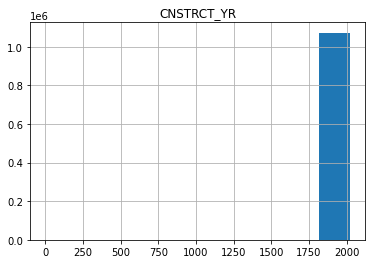

In [28]:
# returning a dataframe of the 'CNSTRCT_YR' column
building_footprints_csv[["CNSTRCT_YR"]].hist()

<AxesSubplot:>

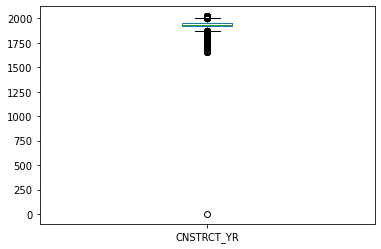

In [29]:
# returning a dataframe of the 'CNSTRCT_YR' column
building_footprints_csv[["CNSTRCT_YR"]].plot.box()

In [30]:
building_footprints_csv.loc[building_footprints_csv["CNSTRCT_YR"] < 1900].describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,42704.00,42704.00,42704.00,42698.00,42704.00,42703.00,42704.00,42704.00,42704.00,42704.00
mean,2730942.22,1888.16,461704.84,38.88,2282.25,58.25,1249.78,153.87,2686535758.08,2686535877.53
std,1083034.35,20.47,281438.15,16.05,717.96,34.46,1993.87,66.48,1067276436.76,1067276337.55
min,1000008.00,1.00,5.00,3.40,1004.00,0.00,65.43,32.37,1000070027.00,1000070027.00
25%,2043397.75,1885.00,227658.75,30.45,2100.00,31.00,811.32,125.70,2038480018.00,2038480018.00
50%,3035314.50,1899.00,449570.50,37.32,2100.00,53.00,976.36,142.41,3012340066.50,3012340066.50
75%,3065016.25,1899.00,677121.00,44.49,2100.00,77.00,1235.27,167.57,3022260049.25,3022260051.50
max,5169977.00,1899.00,1293541.00,473.97,5110.00,340.00,136276.37,2533.97,5080460087.00,5080460087.00


In [31]:
bldgs_before_1990 = building_footprints_csv.loc[building_footprints_csv["CNSTRCT_YR"].between(1500, 1899)]

bldgs_before_1990.head()

,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
18,5065718,1899.00,NaN,MULTIPOLYGON (((-74.14983332006722 40.55011975...,08/22/2017 12:00:00 AM +0000,Constructed,290792,28.68,2100.00,73.00,1588.78,184.78,5051430040.00,5051430040.00,Photogramm
68,3417314,1899.00,NaN,MULTIPOLYGON (((-73.96239465160933 40.64332930...,08/17/2017 12:00:00 AM +0000,Constructed,1191341,13.46,5110.00,34.00,400.92,80.20,3051480051.00,3051480051.00,Photogramm
111,3321949,1899.00,NaN,MULTIPOLYGON (((-73.96377343893835 40.68434962...,08/17/2017 12:00:00 AM +0000,Constructed,78119,10.27,5110.00,70.00,357.47,76.02,3019800026.00,3019800026.00,Photogramm
134,1045196,1899.00,NaN,MULTIPOLYGON (((-73.95541518712452 40.77167243...,08/22/2017 12:00:00 AM +0000,Constructed,562430,50.12,2100.00,39.00,1065.36,152.64,1014510146.00,1014510146.00,Photogramm
158,3062926,1899.00,NaN,MULTIPOLYGON (((-73.9630909105247 40.714212277...,08/22/2017 12:00:00 AM +0000,Constructed,663480,35.57,2100.00,50.00,784.78,116.16,3024050006.00,3024050006.00,Photogramm


In [32]:
bldgs_before_1990.shape

(42703, 15)

In [33]:
bldgs_before_1990['CNSTRCT_YR'].describe()

count   42703.00
mean     1888.20
std        18.32
min      1652.00
25%      1885.00
50%      1899.00
75%      1899.00
max      1899.00
Name: CNSTRCT_YR, dtype: float64

In [34]:
bldgs_before_1990['CNSTRCT_YR'].value_counts()

1899.00    23276
1890.00     1151
1889.00      803
1891.00      722
1892.00      716
           ...  
1803.00        1
1694.00        1
1765.00        1
1809.00        1
1789.00        1
Name: CNSTRCT_YR, Length: 127, dtype: int64

<AxesSubplot:>

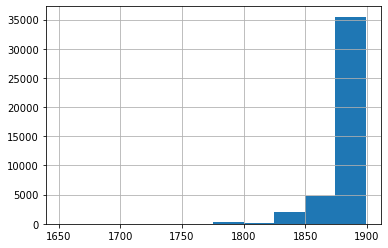

In [35]:
bldgs_before_1990['CNSTRCT_YR'].hist()

<AxesSubplot:>

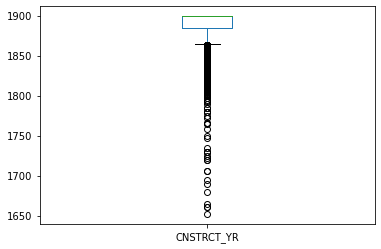

In [36]:
bldgs_before_1990['CNSTRCT_YR'].plot.box()

In [37]:
bldgs_before_1990['CNSTRCT_YR'].isna().sum()

0

In [38]:
%ls

README.md                      examples.ipynb
bldgs_before_1990.csv          mybinder-data-wrangling.ipynb


In [39]:
bldgs_before_1990.to_csv('bldgs_before_1900.csv', index=False)

In [40]:
%ls

README.md                      examples.ipynb
bldgs_before_1900.csv          mybinder-data-wrangling.ipynb
bldgs_before_1990.csv


In [41]:
df = pd.read_csv('bldgs_before_1900.csv')

print(df.shape)

df.head()

(42703, 15)


,BIN,CNSTRCT_YR,NAME,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,5065718,1899.00,NaN,MULTIPOLYGON (((-74.14983332006722 40.55011975...,08/22/2017 12:00:00 AM +0000,Constructed,290792,28.68,2100.00,73.00,1588.78,184.78,5051430040.00,5051430040.00,Photogramm
1,3417314,1899.00,NaN,MULTIPOLYGON (((-73.96239465160933 40.64332930...,08/17/2017 12:00:00 AM +0000,Constructed,1191341,13.46,5110.00,34.00,400.92,80.20,3051480051.00,3051480051.00,Photogramm
2,3321949,1899.00,NaN,MULTIPOLYGON (((-73.96377343893835 40.68434962...,08/17/2017 12:00:00 AM +0000,Constructed,78119,10.27,5110.00,70.00,357.47,76.02,3019800026.00,3019800026.00,Photogramm
3,1045196,1899.00,NaN,MULTIPOLYGON (((-73.95541518712452 40.77167243...,08/22/2017 12:00:00 AM +0000,Constructed,562430,50.12,2100.00,39.00,1065.36,152.64,1014510146.00,1014510146.00,Photogramm
4,3062926,1899.00,NaN,MULTIPOLYGON (((-73.9630909105247 40.714212277...,08/22/2017 12:00:00 AM +0000,Constructed,663480,35.57,2100.00,50.00,784.78,116.16,3024050006.00,3024050006.00,Photogramm


In [42]:
df.CNSTRCT_YR.describe()

count   42703.00
mean     1888.20
std        18.32
min      1652.00
25%      1885.00
50%      1899.00
75%      1899.00
max      1899.00
Name: CNSTRCT_YR, dtype: float64